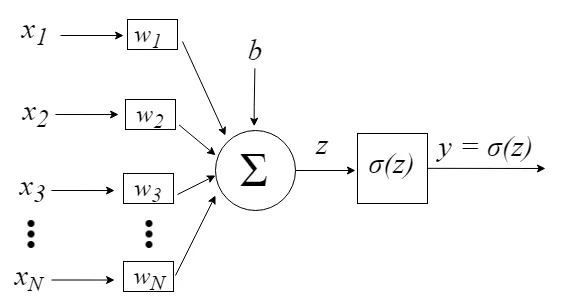

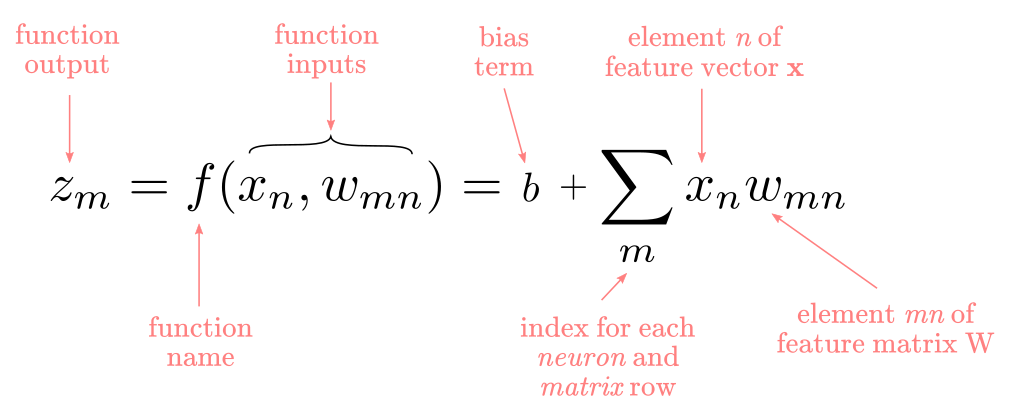

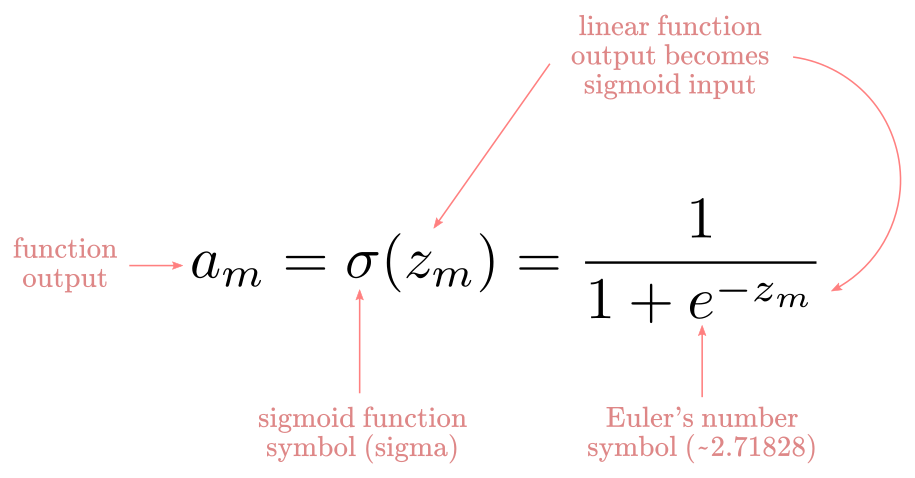

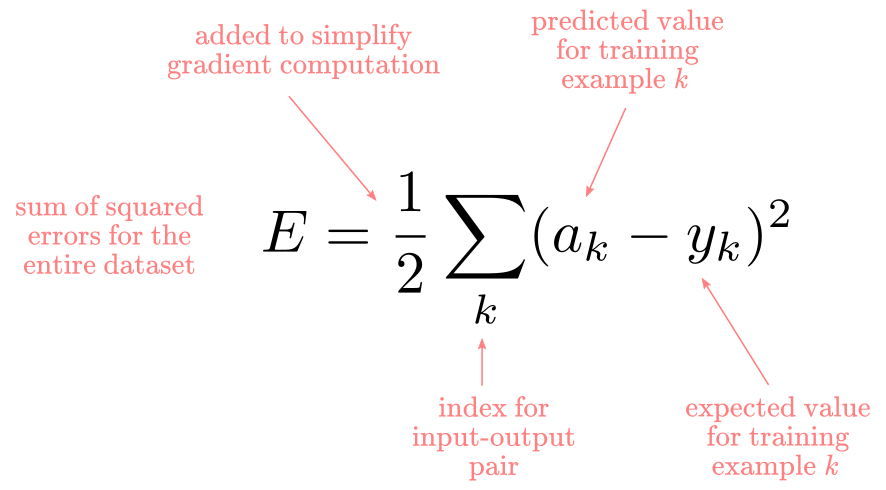

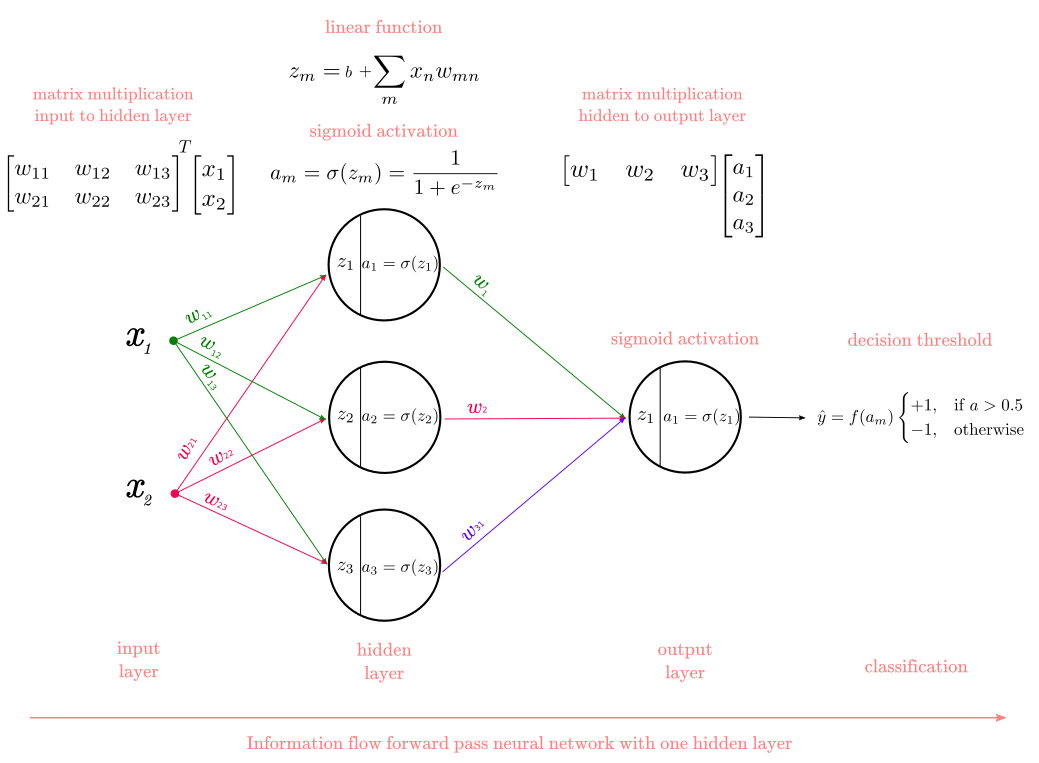

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
def sigmoide(z):
  return 1 / (1 + np.exp(-z))

def sigmoide_derizada_repecto_z(z):
  return sigmoide(z)*(1-sigmoide(z))

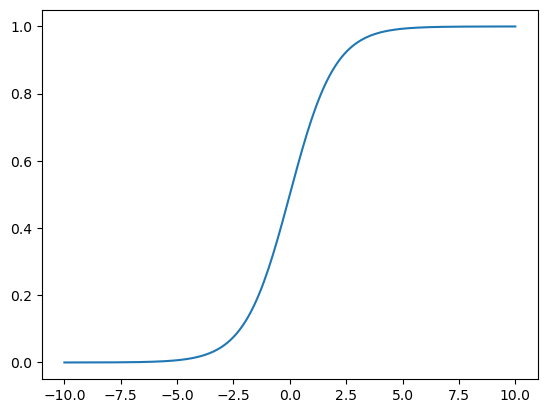

In [4]:
xs = np.linspace(-10, 10, 200)
ys = sigmoide(xs)
plt.plot(xs, ys)

In [16]:
# dataset or
# dt = [[0,0,0], [0,1,1], [1,0,1], [1,1,1]]
# dataset and
dt = [[0, 0, 0],[0, 1, 0],[1, 0, 0],[1, 1, 1]]
# dataset xor
#dt = [[0,0,0], [0,1,1], [1,0,1], [1,1,0]]

dt = np.array(dt)
print(dt)
x = dt[:, [0, 1]]
y = dt[:, [2]]
print(x)
print(y)

[[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 1]]
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [0]
 [0]
 [1]]


In [17]:

w1=2; w2=3; b=4

In [18]:
def salida_sumatorio(x):
  x1 = x[:, [0]]
  x2 = x[:, [1]]
  x1 = x1 * w1
  x2 = x2 * w2
  ret = x1 + x2 + b
  return ret

def salida_activacion(x):
  s = salida_sumatorio(x)
  s2 = sigmoide(s)
  return s2

def error(x, y):
  y_hat = salida_activacion(x)
  err = y_hat - y
  return err

def coste(x, y):
  err = error(x, y)
  c = err**2
  c = c /2
  c = c.mean()
  return c

def derivada_coste_respecto_y_hat(x, y):
  z = error(x, y)
  return z

def derivada_y_hat_respecto_salida_sumatorio(x):
  z = salida_sumatorio(x)
  d = sigmoide_derizada_repecto_z(z)
  return d

def derivada_sumatorio_respecto_w1(x):
  return x[:, [0]]

def derivada_sumatorio_respecto_w2(x):
  return x[:, [1]]

def derivada_sumatorio_respecto_bias():
  return 1

def predice(x):
  y_hat = salida_activacion(x)
  return y_hat


In [19]:
def fit(x, y, epochs=100, lr=0.01):
  global w1, w2, b
  lloss = []
  for epoch in range(epochs):
    dc = derivada_coste_respecto_y_hat(x, y)
    dy = derivada_y_hat_respecto_salida_sumatorio(x)
    dw1 = derivada_sumatorio_respecto_w1(x)
    dw2 = derivada_sumatorio_respecto_w2(x)
    db = derivada_sumatorio_respecto_bias()


    w1 = w1 - (lr*dc*dy*dw1).mean()
    w2 = w2 - (lr*dc*dy*dw2).mean()
    b =  b  - (lr*dc*dy*db).mean()

    loss = coste(x, y)
    #print(f"loss: {loss} w1: {w1} w2: {w2} b: {b}")
    lloss.append(loss)
  return lloss

loss: 0.006206363475387454 w1: 3.7723260360785607 w2: 3.7723260360785607 b: -5.76382897716452
[[0.00312925]
 [0.12009795]
 [0.12009795]
 [0.85579847]]


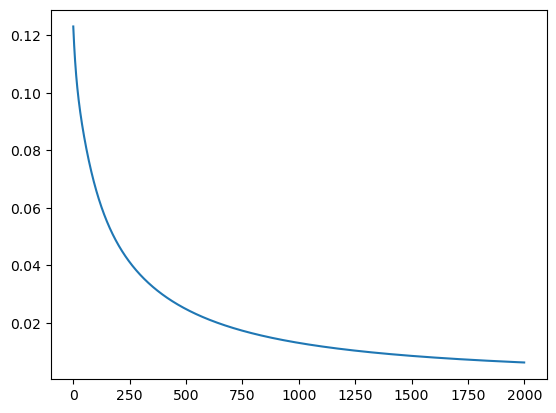

In [20]:
w1 = 0
w2 = 0
b = 0
nepochs = 2000
lloss = fit(x, y, epochs = nepochs, lr=0.5)
print(f"loss: {lloss[-1]} w1: {w1} w2: {w2} b: {b}")
ret = predice(x)
print(ret)
plt.plot([i for i in range(len(lloss))], lloss)